In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('matches.csv',parse_dates = ['date'])

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null datetime64[ns]
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(11)
memory usage: 89.5+ KB


Data is from seasons 2008-2017

In [5]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

14 different teams have played in the ipl

In [6]:
teams = data['team1'].unique()
for i in teams:
    print(i)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants


DL method has been used in IPL for only 16 matches out of 636 matches

In [7]:
data['dl_applied'].value_counts()

0    620
1     16
Name: dl_applied, dtype: int64

#  Which empires did most empiring in IPL

In [46]:
x = data['umpire1'].value_counts()
y = data['umpire2'].value_counts()

print(x)

[1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 6, 6, 7, 7, 7, 7, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 16, 19, 20, 32, 34, 36, 37, 38, 43, 51, 73]


Best players of IPL

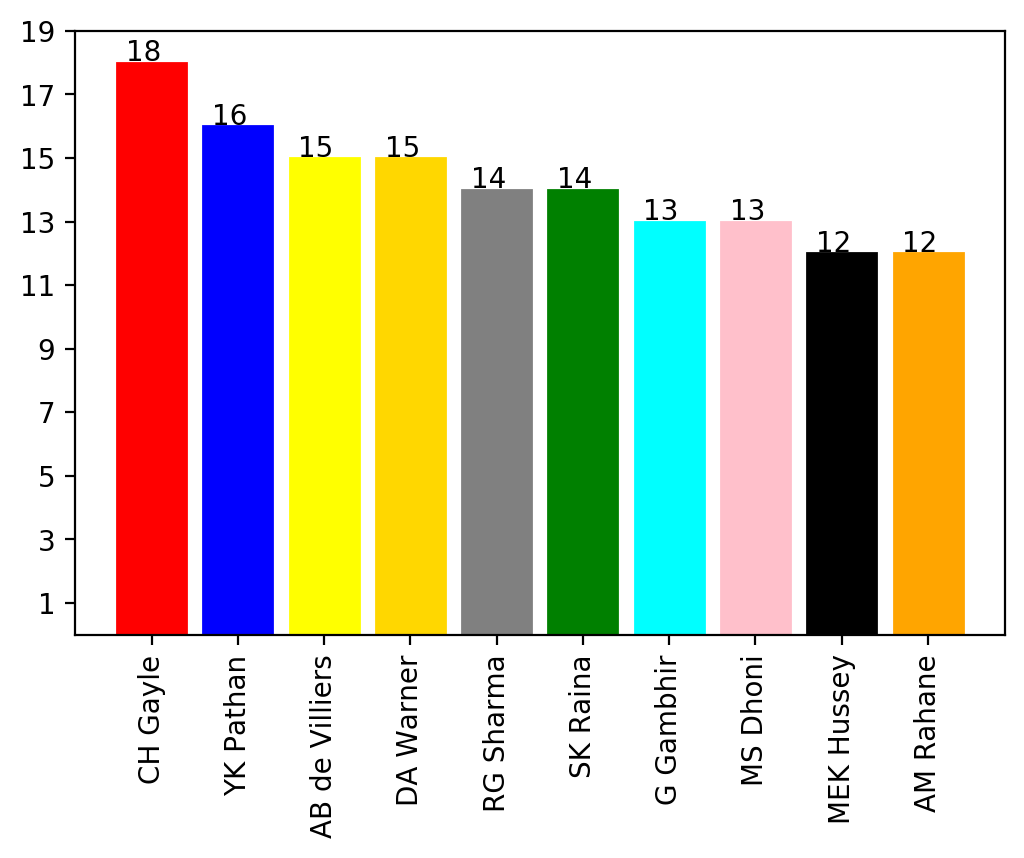

In [111]:
patches = []
man_of_the_match = data['player_of_match'].value_counts()[:10]
fig, ax = plt.subplots()
patches.append(ax.bar(man_of_the_match.index, man_of_the_match.values))
plt.xticks(rotation = 90)
plt.yticks(range(1,20,2))
# for i in ['Top','Right']:
#     ax.spines[i].set_visible(False)
color = ['red','blue','yellow','gold','grey','green','cyan','pink','black','orange']
for patch,i in zip(patches,range(0,8)):
   
    
  
    for h,values,i in zip(patch,man_of_the_match.values,range(0,10)):
        patch.get_children()[i].set_color(color[i])
        a=h.get_x()+h.get_width()/2
        plt.text(a-0.3, h.get_height()+0.3, str(f'{values}'), va="center")
    


Chris Gayle seems to be the most valuable player....With his raw hitting power..noone is surprised

Most of the matches have normal result only 0.5% of the matches have no result and 1.1% end in a tie

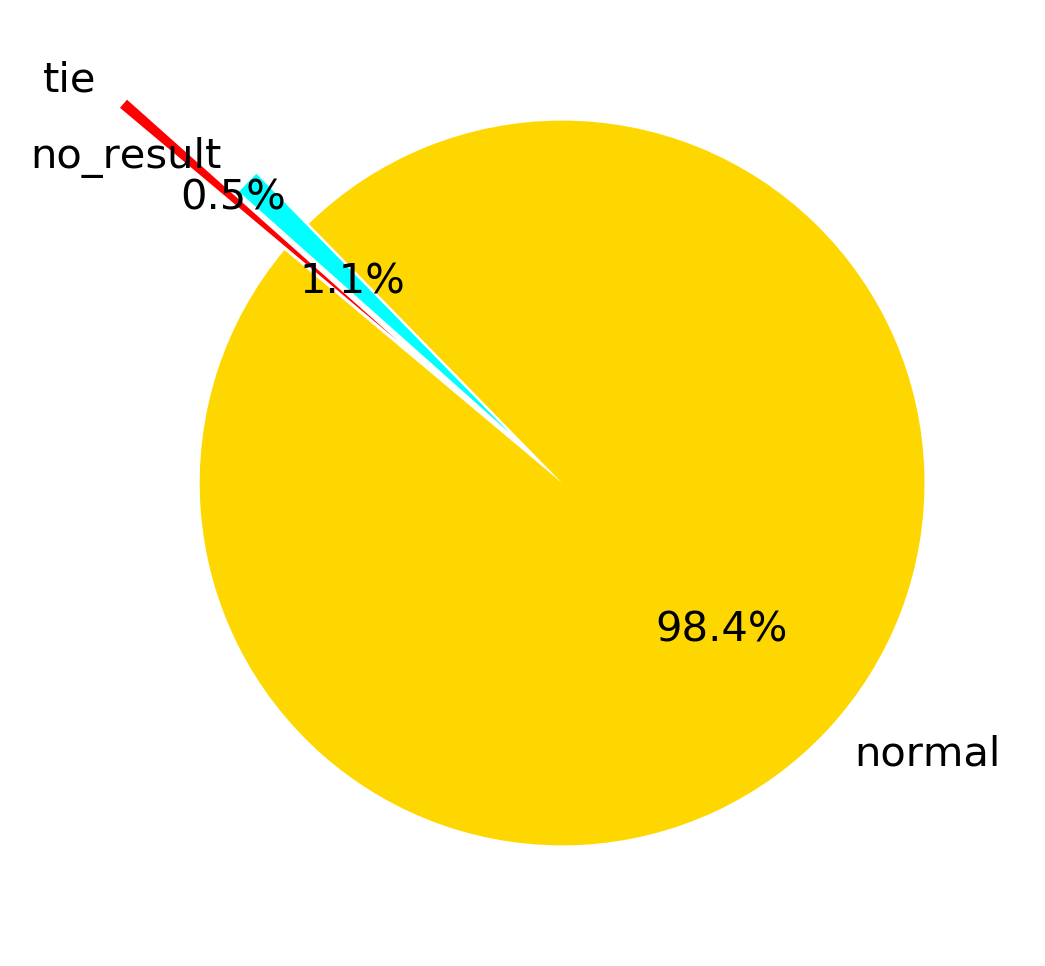

In [9]:
fs = {}
colors = ['gold','cyan','red']
plt.rcParams['figure.dpi'] = 300
f = data['result'].value_counts()
labels = ['normal','no_result','tie']
explode = [0,0.2,0.6]
match = list(f)
plt.pie(match,labels =labels,explode = explode,colors = colors,autopct = '%1.1f%%',labeldistance=1.1, startangle=140)
plt.show()

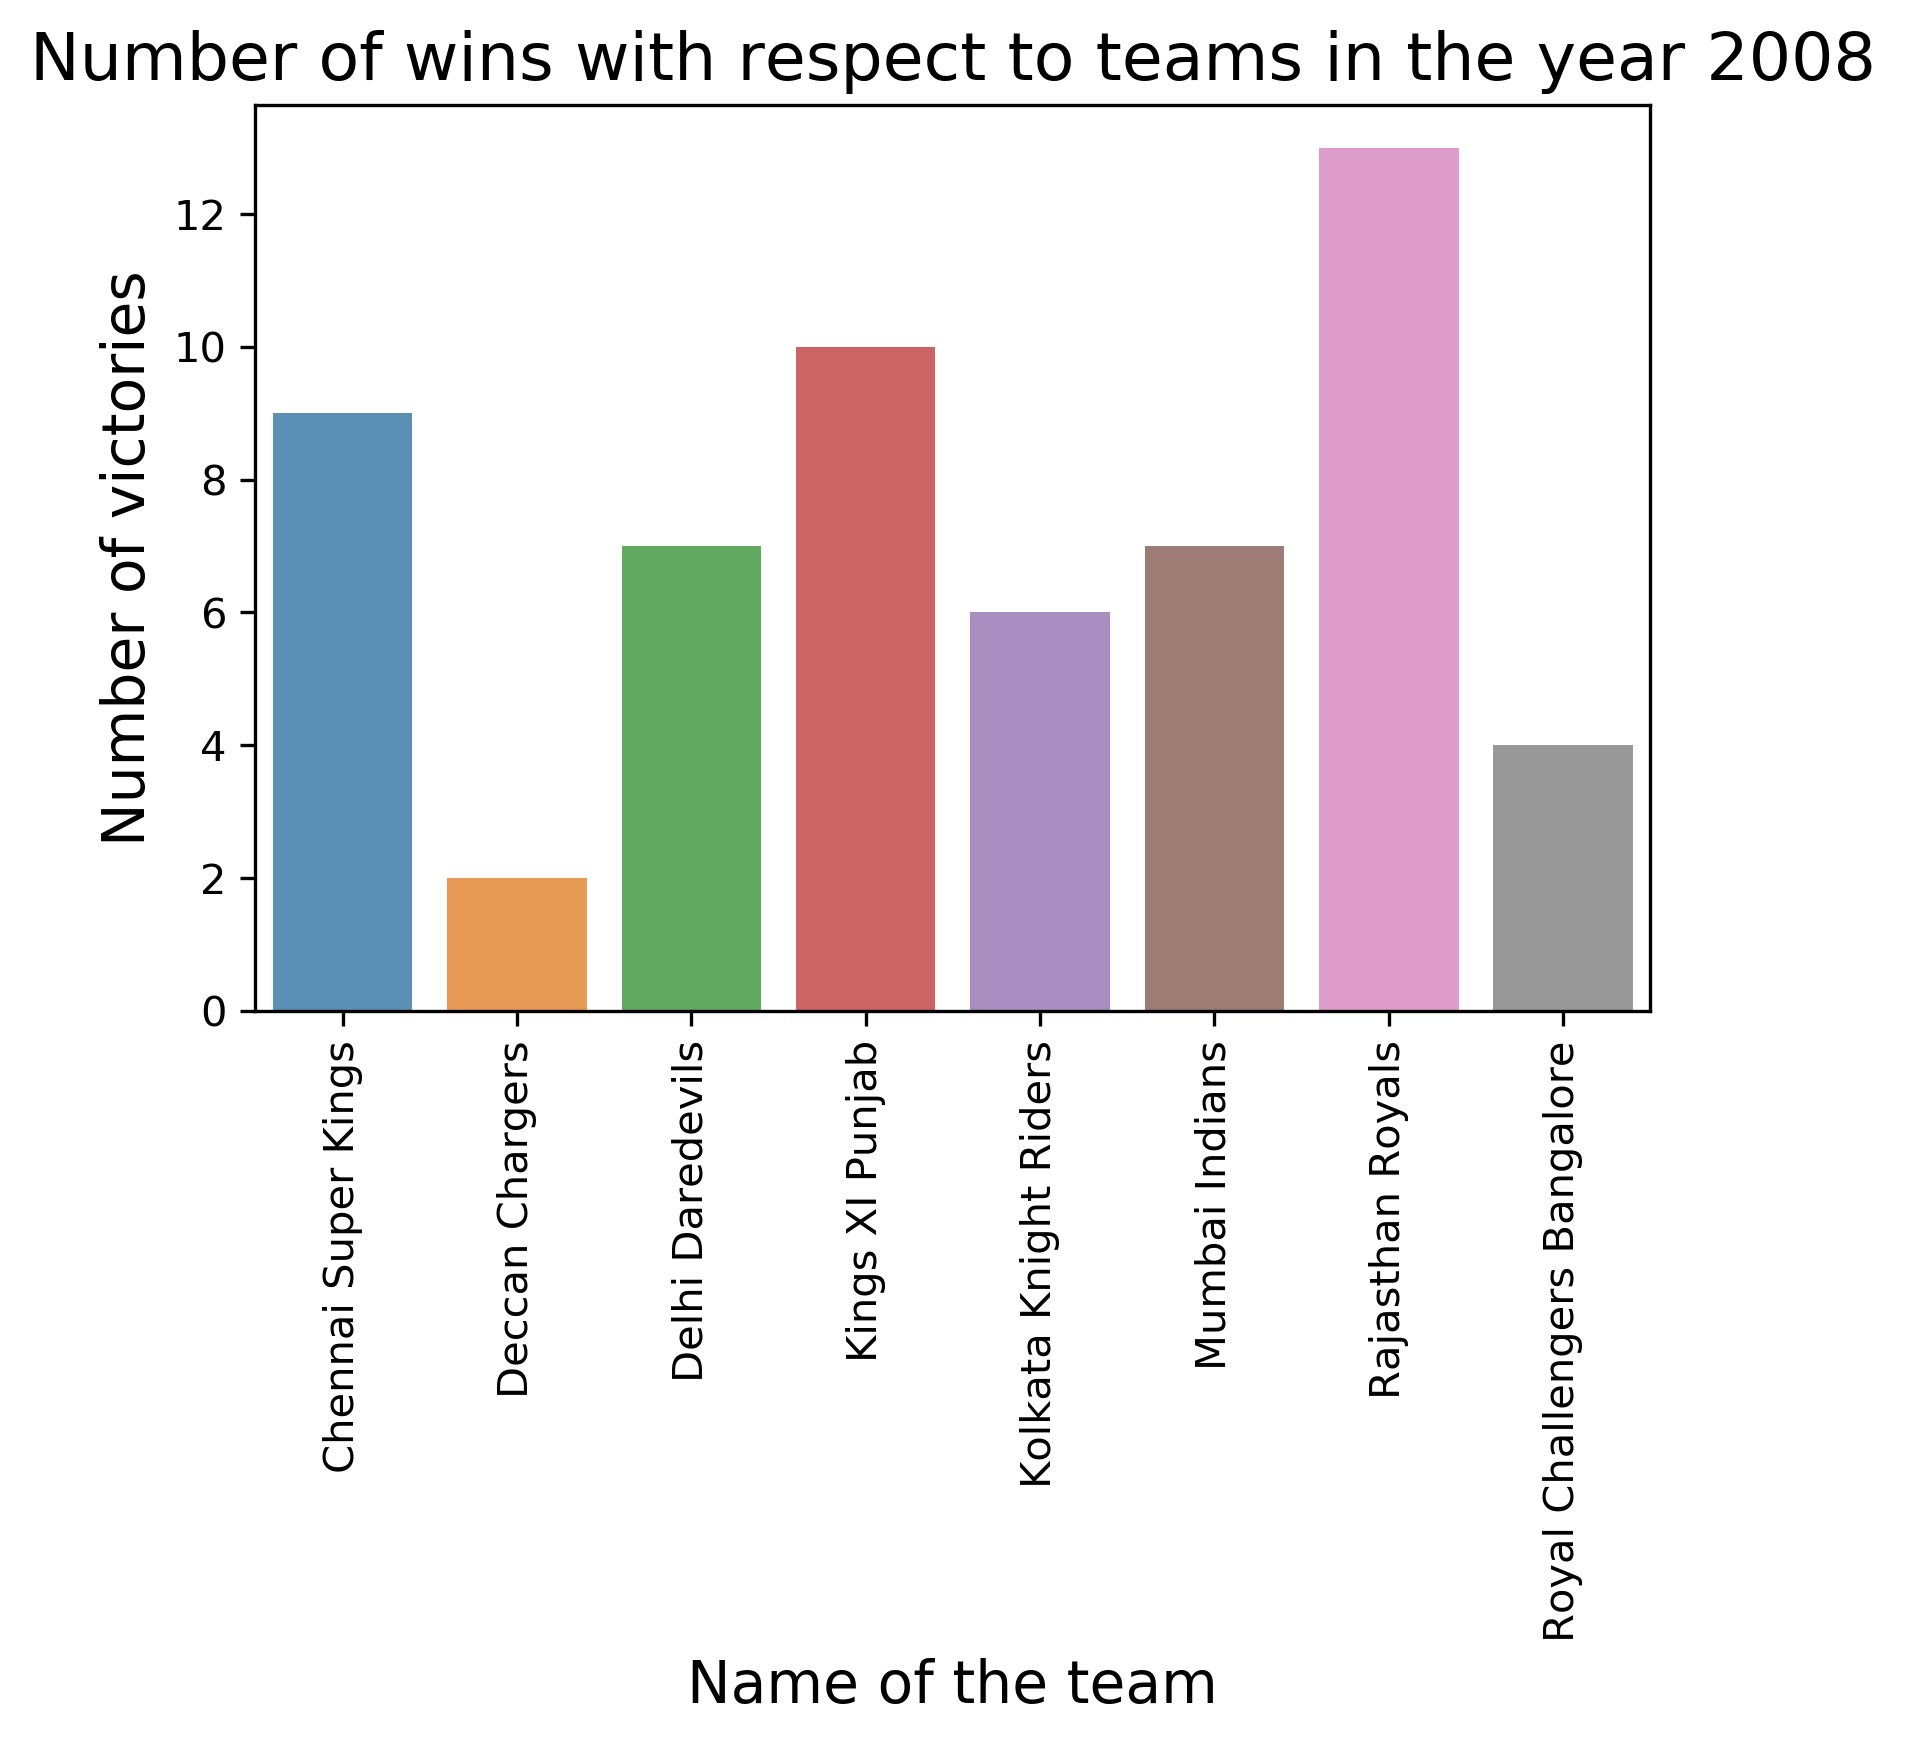

In [10]:
import seaborn as sns
year2008 = data.loc[data['season'] == 2008,:]

Best = year2008.groupby('winner').size()
sns.barplot(Best.index, Best.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Name of the team', fontsize=14)
plt.ylabel('Number of victories', fontsize=14)
plt.title("Number of wins with respect to teams in the year 2008", fontsize=16)
plt.show()

# Performance in the first edition of IPL (2008)

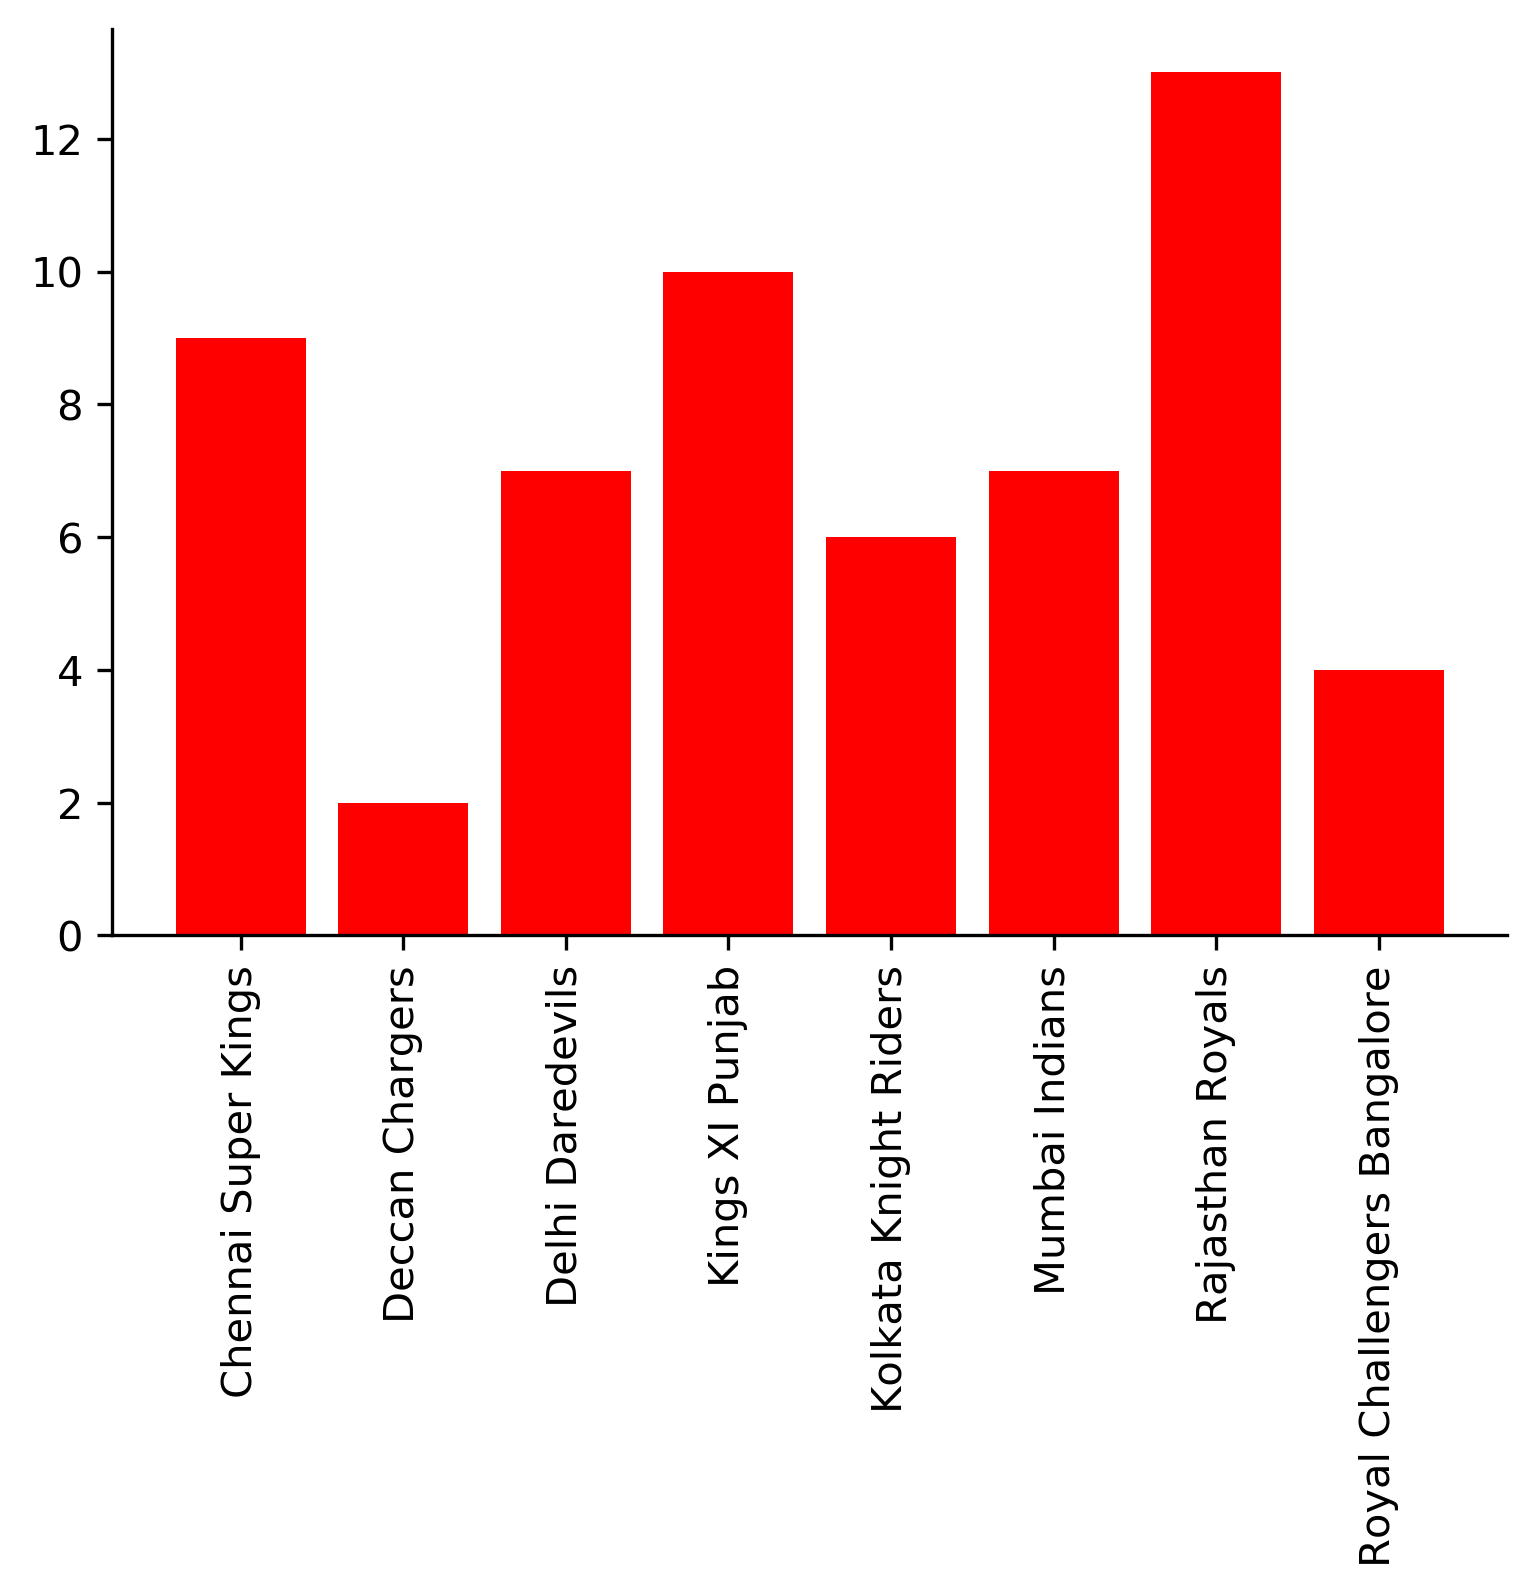

In [11]:

fig, ax = plt.subplots()
f = data[data['season']==2008].groupby('winner')['winner'].count()
ax.bar(f.index,f.values, color = 'red')
for s in ['top', 'right']: 
    ax.spines[s].set_visible(False) 
plt.xticks(rotation = 90)
plt.show()

RR won the trophy and whereas chennai was a finalist, Punjab has won more matches than chennai

# Performance in 2017 IPL

winner
Delhi Daredevils                6
Gujarat Lions                   4
Kings XI Punjab                 7
Kolkata Knight Riders           9
Mumbai Indians                 12
Rising Pune Supergiant         10
Royal Challengers Bangalore     3
Sunrisers Hyderabad             8
dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

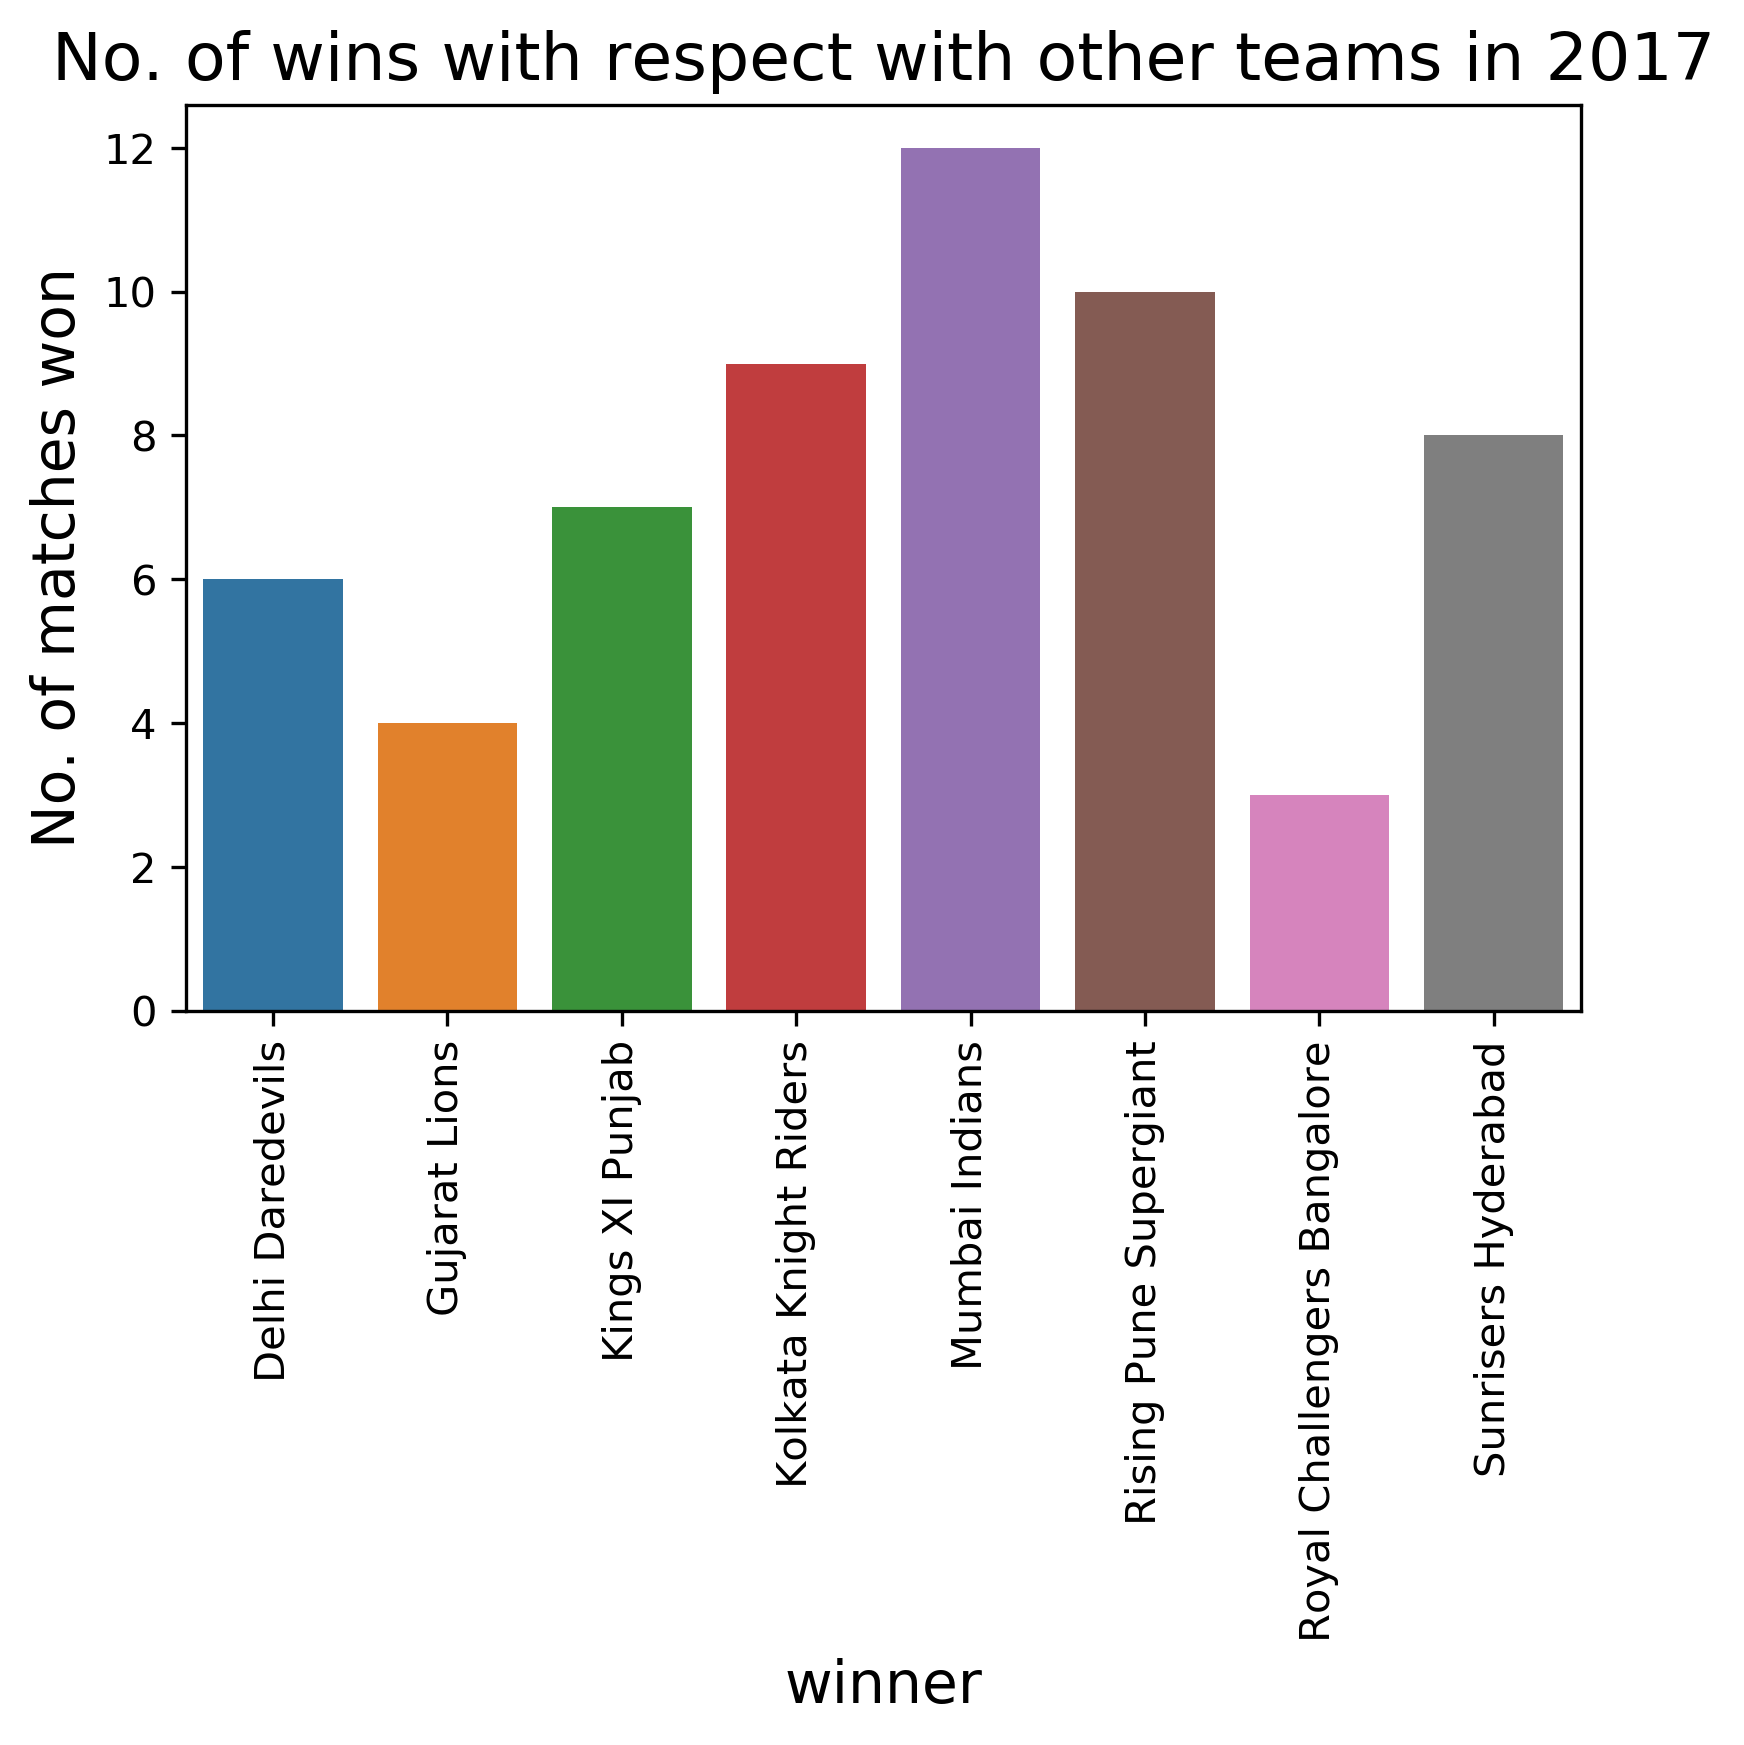

In [12]:
import seaborn as sns
yr2017 = data.loc[data['season']==2017,:]
best = yr2017.groupby('winner').size()
plt.title('No. of wins with respect with other teams in 2017', fontsize = 16)
plt.xlabel('Teams', fontsize = 14)
plt.ylabel('No. of matches won',fontsize = 14)
print(best)
sns.barplot(best.index, best.values)
plt.xticks(rotation = 90)

    



Mumbai have performed well in 2017, They actually won IPL2017

PERFORMANCE ANALYSIS OF MI

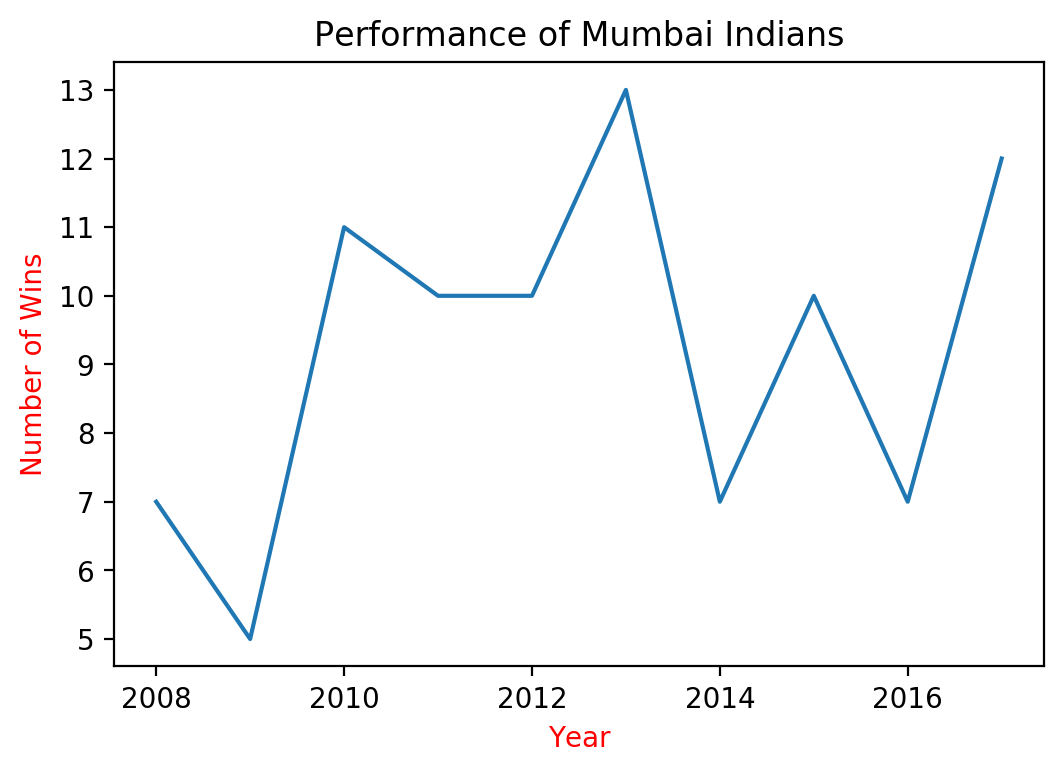

In [23]:
years = data['season'].unique()
years=sorted(years)
w = []
for i in range(0,len(years)):
    y = data[(data['season'] == years[i]) & (data['winner'] == 'Mumbai Indians')]
    wins = y.shape[0]
    w.append(wins)
plt.plot(years,w)
plt.title('Performance of Mumbai Indians')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.show() 

MI won in 2013, 2015 and 2017 registering 13, 10 and 12 wins in those seasons
Mumbai is the most successful IPL franchise with 3 title wins

PERFORMANCE ANALYSIS OF SRH

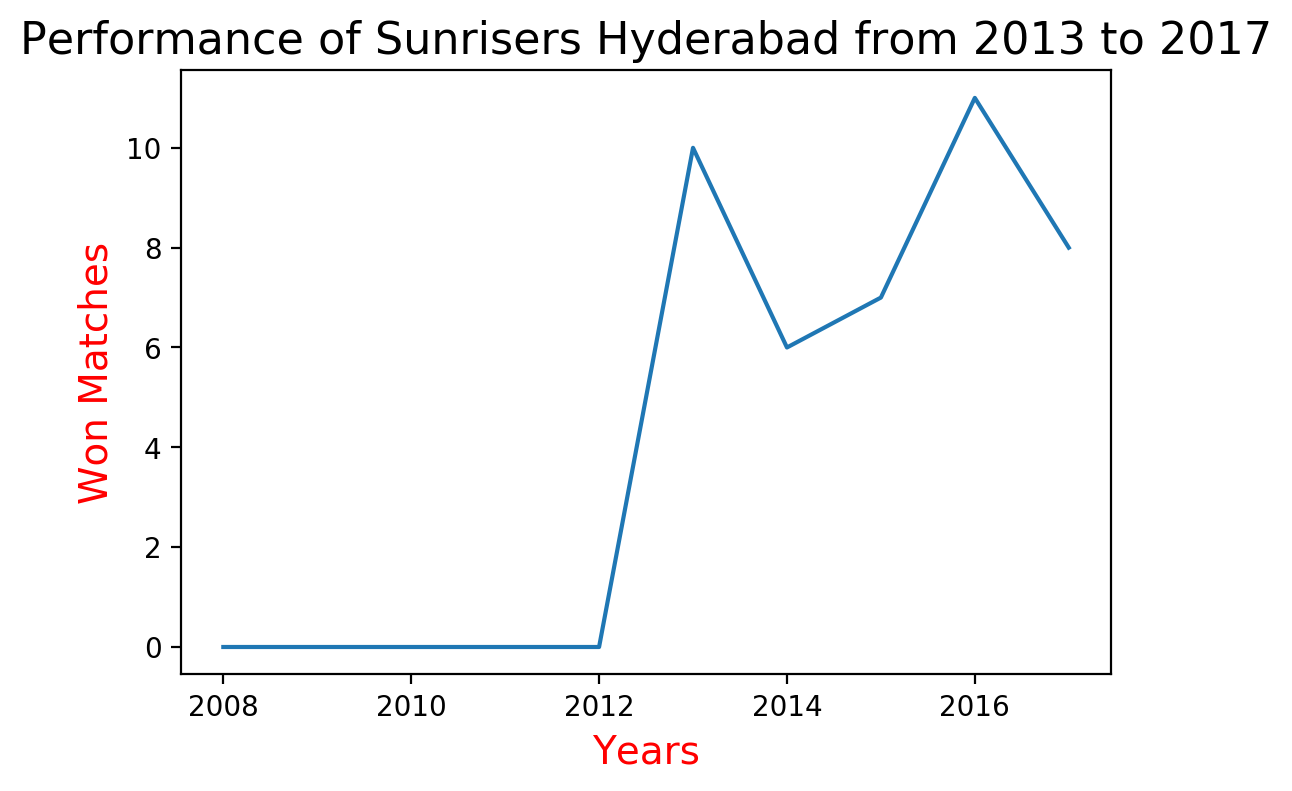

In [22]:

plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.labelcolor'] = 'red'
years= data['season'].unique()
years = sorted(years)
w = []
for i in years:
    wins = data[(data['season']==i)&(data['winner']=='Sunrisers Hyderabad')]
    wins = wins.shape[0]
    w.append(wins)
plt.plot(years, w)
plt.title('Performance of Sunrisers Hyderabad from 2013 to 2017', fontsize = 16)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Won Matches', fontsize = 14)
plt.show()


Sunrisers won the 2016 ipl with 11 wins on the board
SRH registered their poorest performance in 2014 with 6 wins

PERFORMANCE ANALYSIS OF RCB

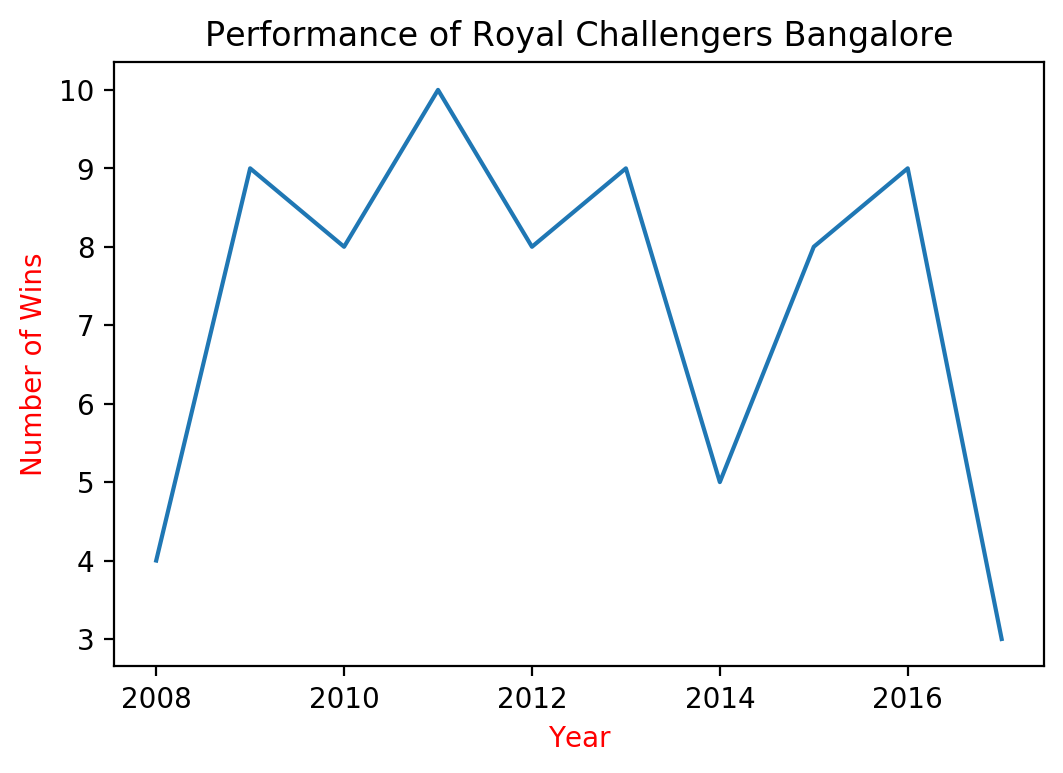

In [24]:
years = data['season'].unique()
years=sorted(years)
w = []
for i in range(0,len(years)):
    y = data[(data['season'] == years[i]) & (data['winner'] == 'Royal Challengers Bangalore')]
    wins = y.shape[0]
    w.append(wins)
plt.plot(years,w)
plt.title('Performance of Royal Challengers Bangalore')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.show() 

RCB is one of the strongest teams in IPL and have delivered consistent performances except years 2008 , 2014 and 2017, but they are yet win the championship title

PERFORMANCE ANALYSIS OF CSK

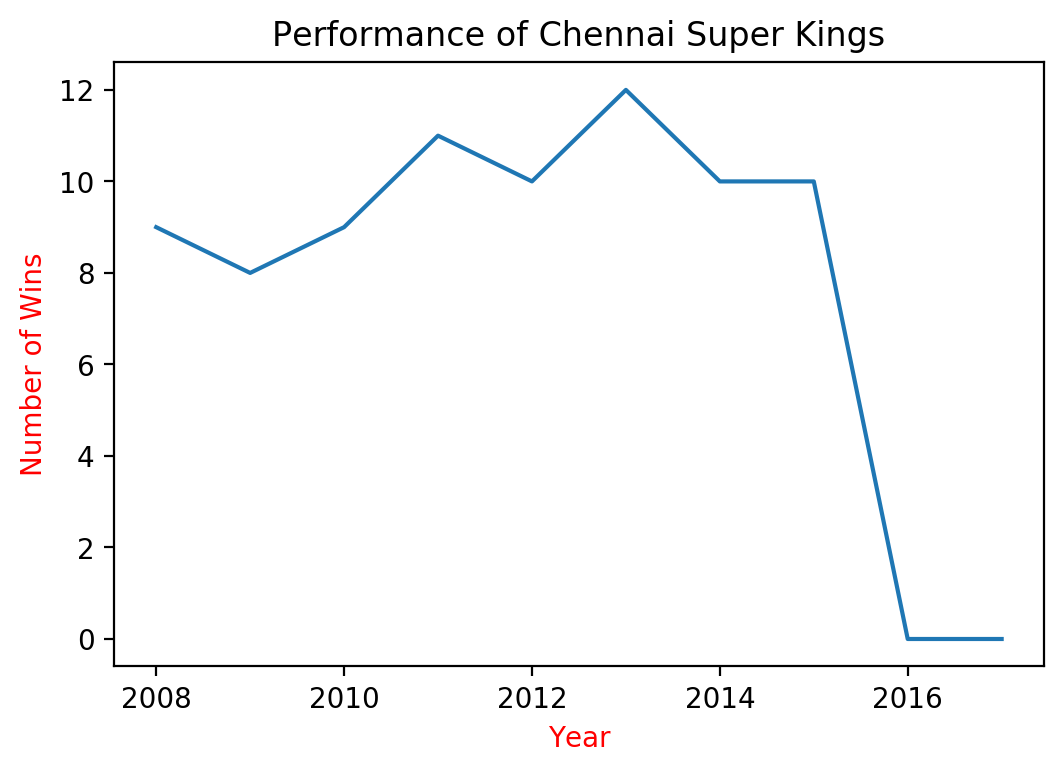

In [26]:
years = data['season'].unique()
years=sorted(years)
w = []
for i in range(0,len(years)):
    y = data[(data['season'] == years[i]) & (data['winner'] == 'Chennai Super Kings')]
    wins = y.shape[0]
    w.append(wins)
plt.plot(years,w)
plt.title('Performance of Chennai Super Kings')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.show() 

CSK is one of the best teams in IPL led by Captain Cool....They ended in the top four consistently before getting banned for matchfixing....they return this year

In [27]:
RCBmatches = (data[(data['team1'] == 'Royal Challengers Bangalore') | (data['team2'] == 'Royal Challengers Bangalore') ])
RCBmatcheswin = (RCBmatches[(RCBmatches['winner'] == 'Royal Challengers Bangalore')])
number_of_wins = RCBmatcheswin['id'].count()
number_of_matches = RCBmatches['id'].count()
print
print("Probability of RCB Winning an IPL match is:",(int(number_of_wins)/int(number_of_matches))*100,"%")

Probability of RCB Winning an IPL match is: 48.026315789473685 %


Seems like RCB are slightly more inclined to lose a match under random conditions

In [28]:
CSKmatches = (data[(data['team1'] == 'Chennai Super Kings') | 
                  (data['team2'] == 'Chennai Super Kings') ])
CSKmatcheswin = (CSKmatches[(CSKmatches['winner'] == 'Chennai Super Kings')])
number_of_wins = CSKmatcheswin['id'].count()
number_of_matches = CSKmatches['id'].count()
print
print("Probability of CSK Winning an IPL match is:",(int(number_of_wins)/int(number_of_matches))*100,"%")

Probability of CSK Winning an IPL match is: 60.30534351145038 %


CSK being a good team have won 60% of their matches, having high winning probabilities

In [29]:
MImatches = (data[(data['team1'] == 'Mumbai Indians') | 
                  (data['team2'] == 'Mumbai Indians') ])
MImatcheswin = (MImatches[(MImatches['winner'] == 'Mumbai Indians')])
number_of_wins = MImatcheswin['id'].count()
number_of_matches = MImatches['id'].count()
print
print("Probability of MI Winning an IPL match is:",(int(number_of_wins)/int(number_of_matches))*100,"%")

Probability of MI Winning an IPL match is: 58.59872611464968 %
